In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import time

In [2]:
regreglu = pd.read_csv('dataset/regresionglucosa.csv',index_col=0)
regreglu.head()

,PatientID,Pregnancies,PlasmaGlucose,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,34,23,43.509726,1.213191,21,0
1,1147438,8,92,47,36,21.240576,0.158365,23,0
2,1640031,7,115,52,35,41.511523,0.079019,23,0
3,1883350,9,103,25,304,29.582192,1.282870,43,1
4,1424119,1,85,27,35,42.604536,0.549542,22,0


In [3]:
regreglu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         15000 non-null  int64  
 1   Pregnancies       15000 non-null  int64  
 2   PlasmaGlucose     15000 non-null  int64  
 3   TricepsThickness  15000 non-null  int64  
 4   SerumInsulin      15000 non-null  int64  
 5   BMI               15000 non-null  float64
 6   DiabetesPedigree  15000 non-null  float64
 7   Age               15000 non-null  int64  
 8   Diabetic          15000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.1 MB


<AxesSubplot:ylabel='Frequency'>

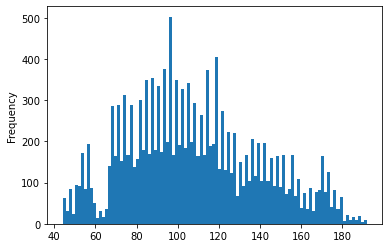

In [4]:
regreglu['PlasmaGlucose'].plot.hist(bins=100)

In [5]:
columns = [col for col in regreglu.columns if col not in ['PlasmaGlucose','PatientID']]
X = regreglu[columns]
y = regreglu['PlasmaGlucose']

In [6]:
X=X.head(2000)
y=y.head(2000)

In [7]:
X.shape

(2000, 7)

In [8]:
y.shape

(2000,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

In [10]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1600, 7)

(400, 7)

(1600,)

(400,)

In [15]:
lr = LogisticRegression(penalty='l2',dual=False,max_iter=110)
lr

LogisticRegression(max_iter=110)

In [16]:
lr.fit(X,y)

C:\Users\NAIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=110)

In [17]:
lr.score(X,y)

0.035

In [18]:
kfold = KFold(n_splits=3, random_state=7)
kfold

C:\Users\NAIN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KFold(n_splits=3, random_state=7, shuffle=False)

In [19]:
result = cross_val_score(lr, X, y, cv=kfold, scoring='accuracy')
result

C:\Users\NAIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NAIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

array([0.00749625, 0.005997  , 0.02252252])

In [20]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)
param_grid 

{'dual': [True, False], 'max_iter': [100, 110, 120, 130, 140]}

In [21]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\NAIN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Best: 0.015002 using {'dual': False, 'max_iter': 140}
Execution time: 17.791820287704468 ms


C:\Users\NAIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
grid_result.best_score_

0.01500150825488157

In [23]:
regre2=regreglu[['PatientID','PlasmaGlucose']]
regre2.head()

,PatientID,PlasmaGlucose
0,1354778,171
1,1147438,92
2,1640031,115
3,1883350,103
4,1424119,85


In [24]:
#no es linealmente separable

In [25]:
#lr = RandomForestRegressor(n_estimators=200,max_depth=10,random_state=2)
lr=LogisticRegression(dual=False,max_iter=110)
fitting = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X,y)

C:\Users\NAIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.0265

In [26]:
#no es linealmente separable